In [2]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'xsec_momentum_weighted/' 
output_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_files/'
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

plot_systematic = 0

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Welcome to JupyROOT 6.10/08


In [3]:
#!jupyter nbconvert --to script numuCCana_xsec_weighted.ipynb

In [4]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# CRTinBNB tagger, Overlay or MC

In [5]:
# Load input files
#inputdir = '/home/thomasm/numuCC/V33/10kevents/'
outputdir_png, outputdir_root = NuCC.prepareOutput(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"xsec_momentum_wighted.root","RECREATE");

#filename_overlay = 'NuCCana_Overlay_V18_V4.root'
filename_overlay = 'NuCCana_overlay_V26_weight.root'
#filename_overlay = 'NuCCana_overlay_v25_weighted_all.root'
filename_data = 'NuCCana_data_V22.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'
    
tree_name = 'numuCCAna'

In [6]:
#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =     8.649e+18  # best with tor875
data_trigger = 1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''
sample = [data,ext,overlay,dirt]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt'}

scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)

scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	989745
Data: Number of Entries:	33178
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

POT: 
Data:		8.649e+18
Ext:		0
Overlay:	1.24025430537e+21
Dirt:		1.25019694173e+20

Scalefactors: 
Data:		1.0
Ext:		0.0976176954382
Overlay:	0.00697356982562
Dirt:		0.0691811002835


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


In [7]:
if 1:
    filename_overlay = filename_overlay+'out33.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out33.root'
    filename_ext = filename_ext+'out33.root'
    filename_dirt = filename_dirt+'out33.root'

    tree_name = 't_out'

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]

Overlay: Number of Entries:	989714
Data: Number of Entries:	33177
Ext: Number of Entries:		222701
Dirt: Number of Entries:	40807



In [8]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

Fiducial Volume:  49184671.35
Beam flux = 6.34870e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [9]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')
    
num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [10]:
for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)

In [11]:
# Load the global variables for access of functions
NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root)
#NuCC.printGlobal()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [12]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

In [13]:
track_start_border_x = '(TrackStart_x_sce <(-1.55+1) || TrackStart_x_sce > (254.8-1))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+1) || TrackEnd_x_sce > (254.8-1))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+1) || TrackStart_y_sce > (117.47-1))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+1) || TrackEnd_y_sce > (117.47-1))'
track_start_border_z = '(TrackStart_z_sce <(0.1+1) || TrackStart_z_sce > (1036.9-1))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+1) || TrackEnd_z_sce > (1039.9-1))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-4)<0.8 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-3.57+3.195-4)<0.8 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-4)<0.8 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-3.57+3.195-4)<0.8 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)

weight_name = 'EventWeight*TunedCentralValue_Genie'


In [14]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
eff , pur = NuCC_w.printEff_w(cut)

Efficiency for cut:  fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1
Used weight:  EventWeight*TunedCentralValue_Genie

Keep of     ext:	11.24%	 reject:	88.76%
Keep of    dirt:	18.73%	 reject:	81.27%
Keep of overlay:	56.53%	 reject:	43.47%

Efficiency:		50.85%
Purity:			71.77%
Purity*Efficiency	36.49

Amount of     ext:	10.67%
Amount of    dirt:	2.47%
Amount of overlay:	86.87%

Signal definition=  numu_lowpur: 2.67%
Signal definition=   numu_other: 0.77%
Signal definition=    numu_nomu: 2.69%
Signal definition=      numu_ov: 5.60%
Signal definition=  numu_signal: 71.77%
Signal definition=      numu_nc: 3.36%


Warning in <TFile::Append>: Replacing existing TH1: h_weight_func (Potential memory leak).


In [15]:
# calculate total flux integrated cross section:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
N_data = data_out.GetEntries(cut)
N_ext  = ext_out.GetEntries(cut)*scale_out[ext_out]
N_dirt = dirt_out.GetEntries(cut)*scale_out[dirt_out]
N_overlay = overlay_out.GetEntries(cut+'&& !numu_signal')*scale_out[overlay_out]
N_signal = overlay_out.GetEntries(cut+'&& numu_signal')*scale_out[overlay_out]

h_weight_func = ROOT.TH1F("h_weight_func",'h_weight_func',1000,0,100)
globale.overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && 1','0')
dirt_pass_weight = h_weight_func.GetMean() 
globale.overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && numu_signal','0') # weights for signal definition
overlay_signal = h_weight_func.GetMean()
globale.overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && 1','0') # weights for signal definition
overlay_pass_weight = h_weight_func.GetMean()

N_dirt = N_dirt*dirt_pass_weight
N_overlay = N_overlay*overlay_pass_weight
N_signal = N_signal*overlay_signal

sigma_tot = (N_data- (N_ext+N_dirt+N_overlay))/(eff/100.0*beam_flux*N_tot)
print 'Number of data:', N_data
print 'Number of ext:', N_ext
print 'Number of dirt:', N_dirt
print 'Number of overlay:', N_overlay
print 'Number of overlay signal:', N_signal

print 'Total integrated cross section:', sigma_tot

sigma_tot_MC = (N_signal)/(eff/100.0*beam_flux*N_tot)
print 'Total integrated cross section for MC:', sigma_tot_MC

Number of data: 1446
Number of ext: 157.945431219
Number of dirt: 36.520081854
Number of overlay: 234.655385197
Number of overlay signal: 1062.20781359
Total integrated cross section: 7.6770041506e-39
Total integrated cross section for MC: 8.01921662059e-39


In [16]:
from array import array
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
binnum = len(mom_bins) - 1
h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))

785

Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Histograms are filled with weights
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_weighted//png/h_eff_trueMom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_weighted//root/h_eff_trueMom.root has been created


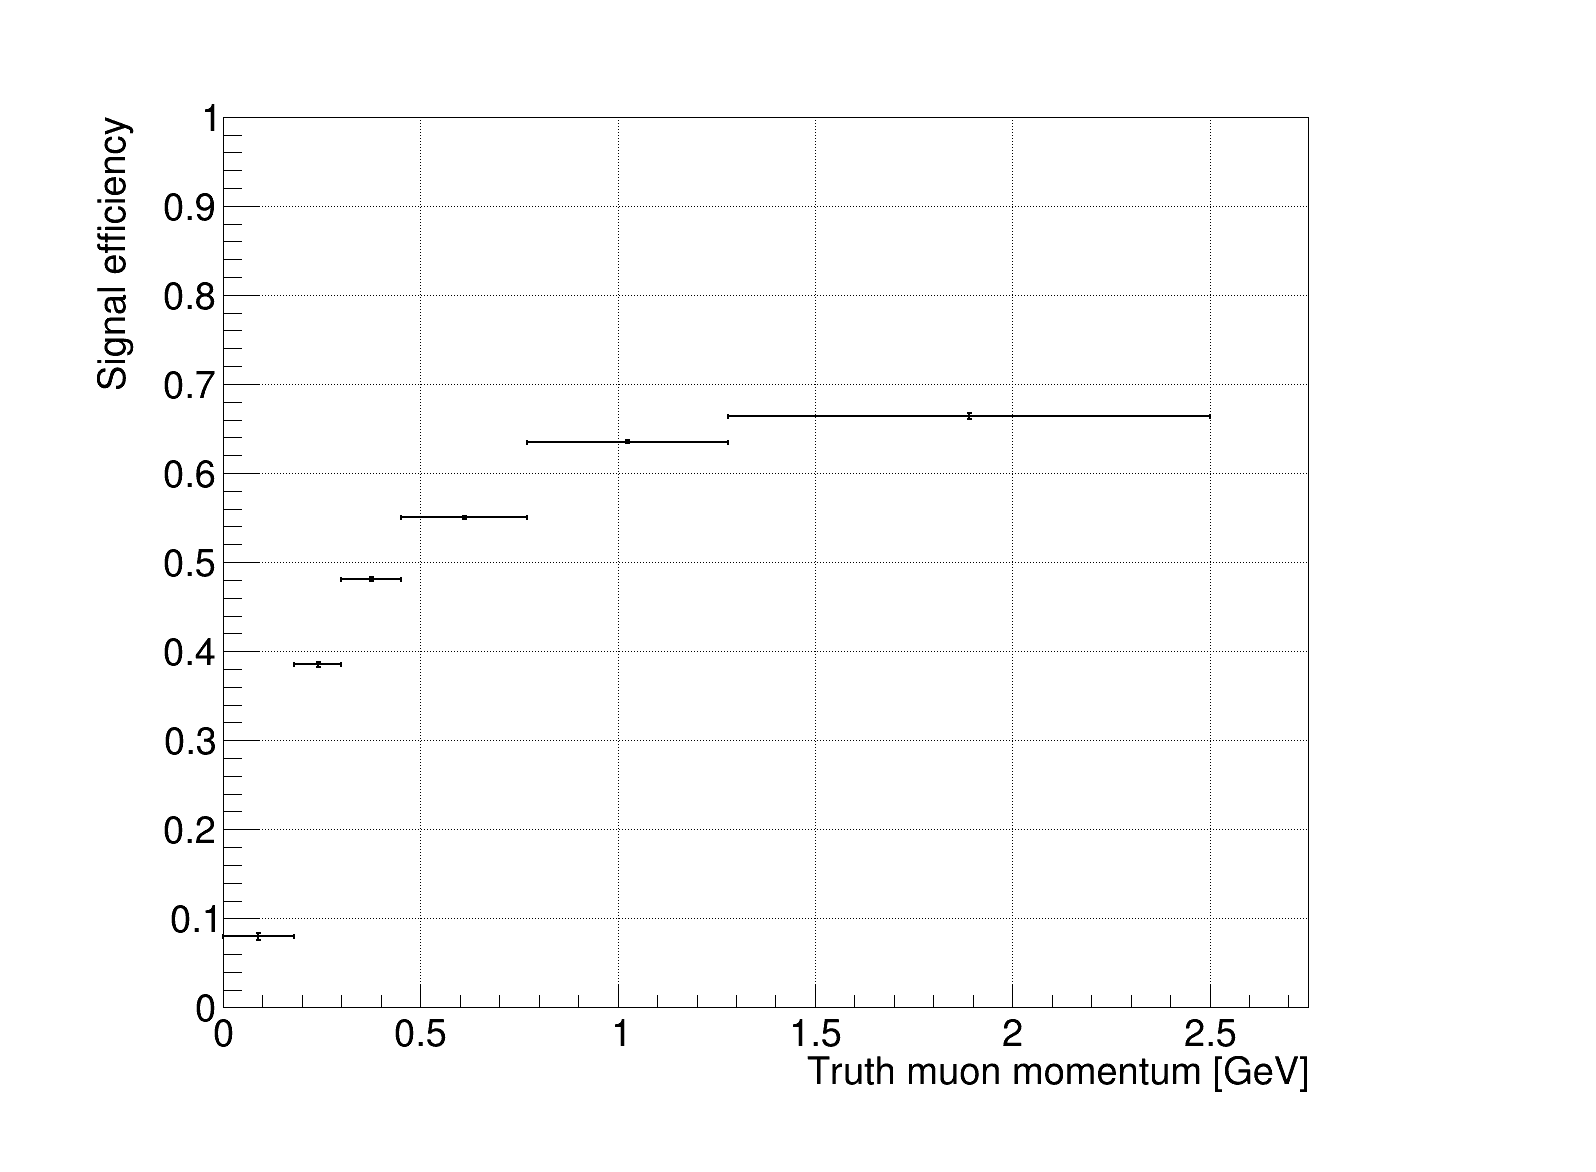

In [17]:
xstart = 0
xend = 2
xbin = 100
weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum momentum efficiency'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
#h_init_eff_energy = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy,zahler_cut)
#h_init_eff_energy_1 = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy_1,nenner_cut)
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
eff =  ROOT.TEfficiency(h_init_eff_energy,h_init_eff_energy_1)
eff.SetStatisticOption(ROOT.TEfficiency.kFCP)#;  // to set option for errors (see ref doc)
eff.SetConfidenceLevel(0.68)
eff.SetTitle(title)
eff.Draw("AP")
ROOT.gPad.Update()
graph = eff.GetPaintedGraph()
graph.SetMinimum(0)
graph.SetMaximum(1)
graph.SetLineWidth(2)
graph.GetXaxis().SetTitle("Truth muon momentum [GeV]")
graph.GetYaxis().SetTitle("Signal efficiency")
graph.Draw("AP")
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_trueMom.png")
c1.SaveAs(globale.outputdir_root + "h_eff_trueMom.root")

eff.Write("h_eff_true")

180626

Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_weighted//root/h2_true_MCS.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_weighted//png/h2_true_MCS.png has been created


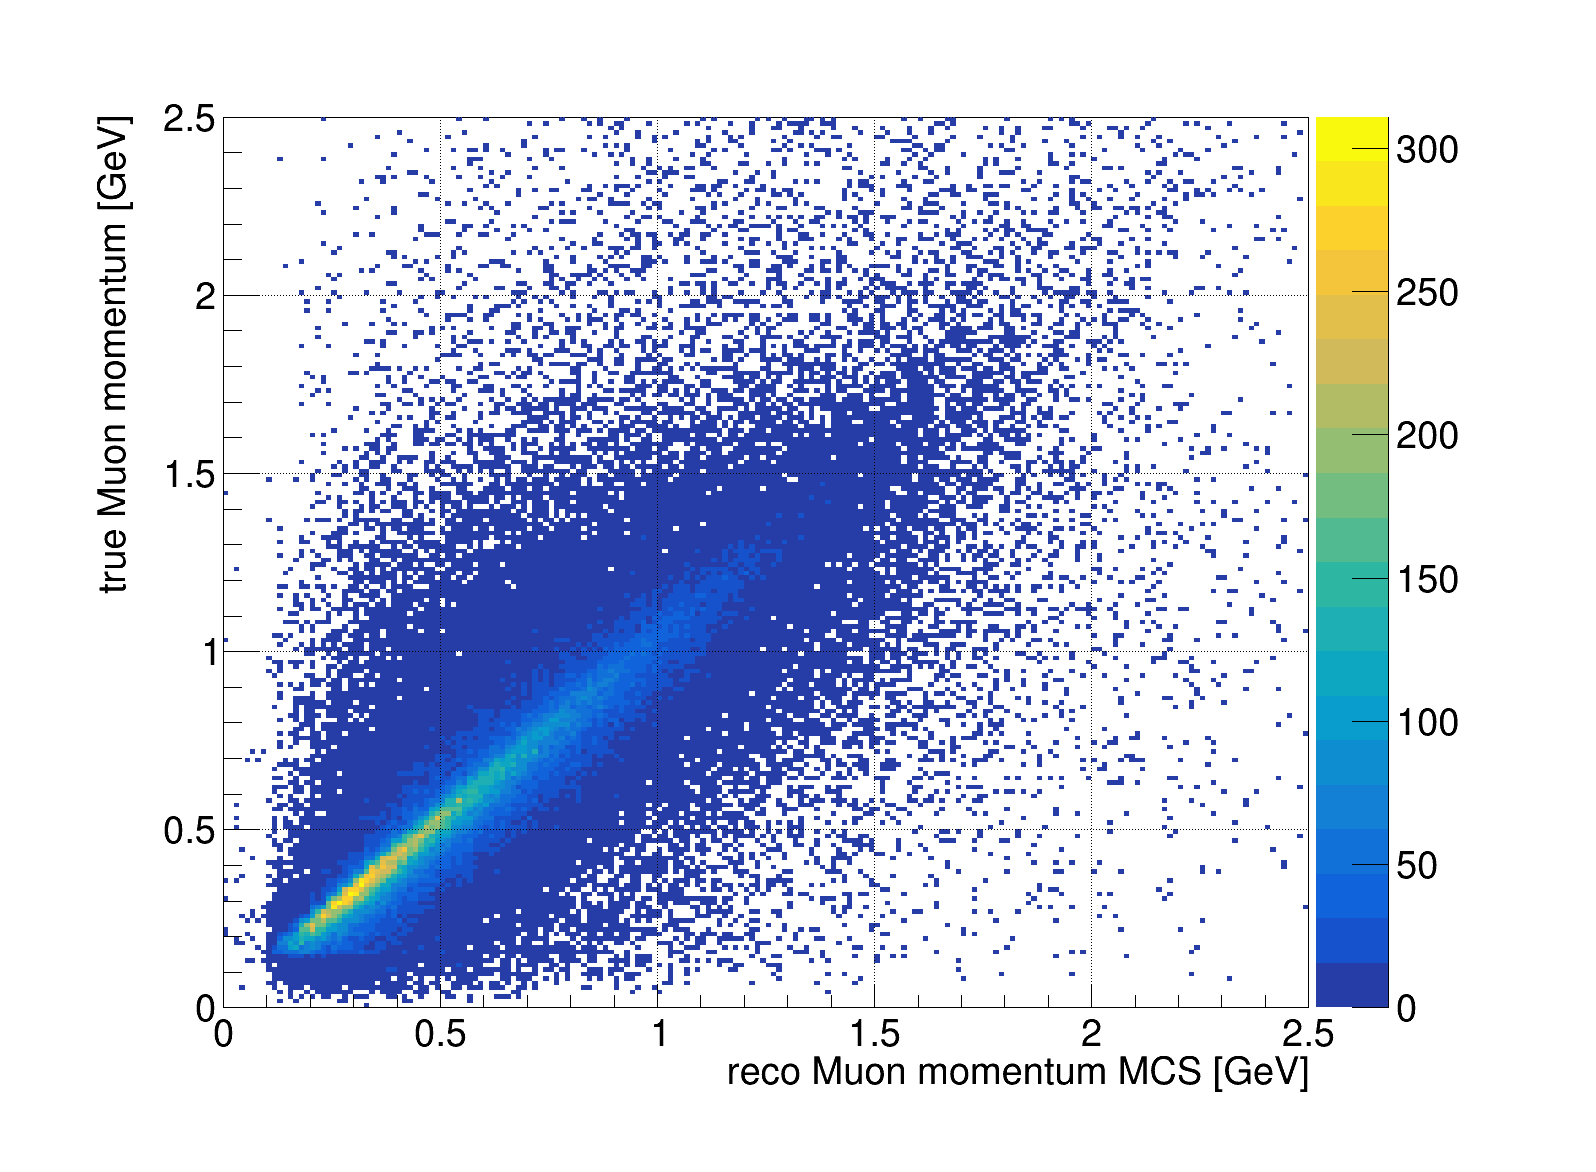

In [18]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',200,0,2.5,200,0,2.5)
globale.overlay_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&& numu_true)','')
h_migration.SetXTitle("reco Muon momentum MCS [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
h_migration.Draw("colz")
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_MCS.root")
c1.SaveAs(globale.outputdir_png + "h2_true_MCS.png")
h_migration.Write("h2_true_MCS_fine")

1261

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_weighted//root/h2_true_MCS_bin.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_weighted//png/h2_true_MCS_bin.png has been created


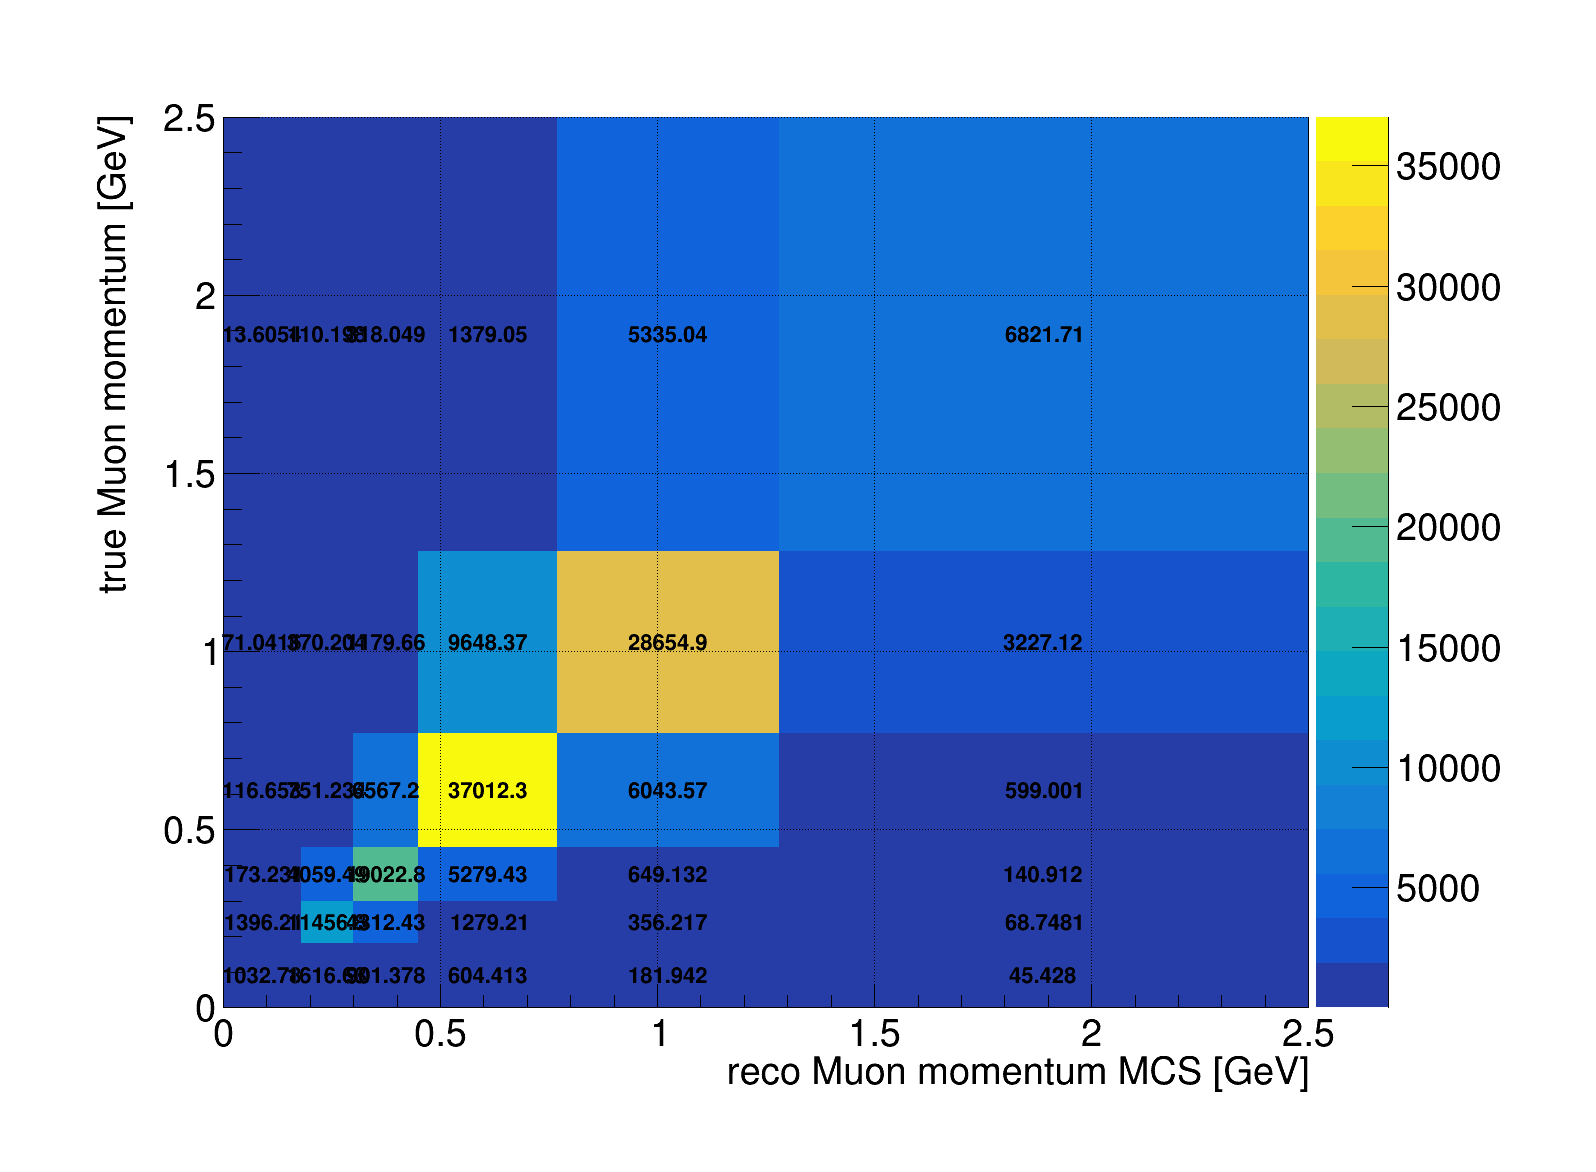

In [19]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
globale.overlay_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&& numu_true)','')
h_migration.SetXTitle("reco Muon momentum MCS [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
h_migration.Draw("colz")
h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_MCS_bin.root")
c1.SaveAs(globale.outputdir_png + "h2_true_MCS_bin.png")
h_migration.Write("h2_true_MCS_bin")

[[2.35331734e-01 7.39651394e-02 5.90166490e-03 2.28048329e-03
  1.64197566e-03 9.61834500e-04]
 [3.68381909e-01 6.06929809e-01 1.38299364e-01 1.46860659e-02
  8.55646460e-03 7.79045188e-03]
 [2.05390622e-01 2.28453947e-01 6.48070499e-01 1.28383802e-01
  2.72652240e-02 2.24845114e-02]
 [1.37723271e-01 6.77669649e-02 1.79860240e-01 7.23563591e-01
  2.23001563e-01 9.74918817e-02]
 [4.14578560e-02 1.88708387e-02 2.21147090e-02 1.18147389e-01
  6.62296203e-01 3.77160707e-01]
 [1.03513500e-02 3.64198391e-03 4.80059427e-03 1.17100348e-02
  7.45879002e-02 4.82261327e-01]
 [1.36325838e-03 3.71317233e-04 9.52928659e-04 1.22863414e-03
  2.65066991e-03 1.18492867e-02]]


711

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_weighted//png/h_mitigation_matrix.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_weighted//root/h_mitigation_matrix.root has been created


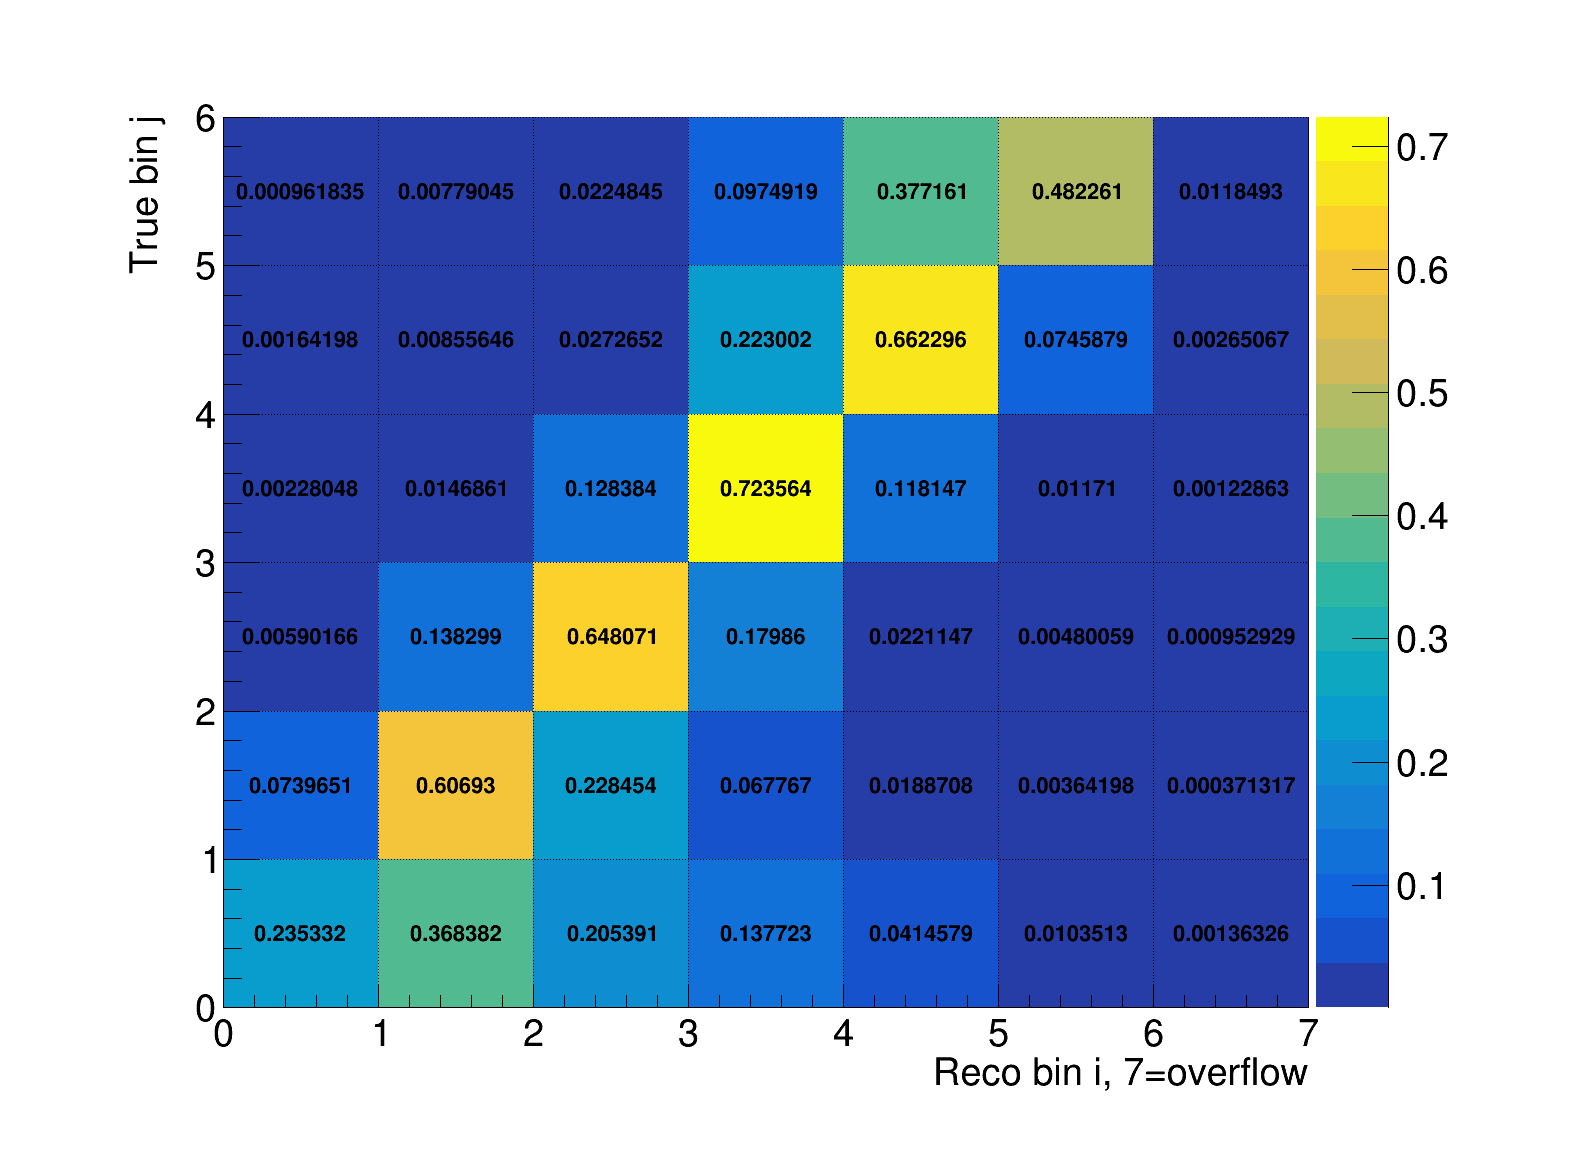

In [20]:
reco_entries = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
mitigation_matrix = np.zeros((7,6))
for j in range(1,binnum+1):
    for i in range(1,binnum+2):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        reco_entries[j-1]+=h_migration.GetBinContent(i,j)
h_mitigation_matrix = ROOT.TH2F("h_migration",'Migration matrix',7,0,7,6,0,6)
for j in range(1,binnum+1):
    for i in range(1,binnum+2):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        mitigation_matrix[i-1,j-1]= h_migration.GetBinContent(i,j)/reco_entries[j-1]
        h_mitigation_matrix.SetBinContent(i,j,mitigation_matrix[i-1,j-1])
        #print i-1,j-1,mitigation_matrix[i-1,j-1]
        #true_entries[j]+=h_migration.GetBinContent(i,j)
print mitigation_matrix
np.save(output_filedir+'migration_matrix_momentum',mitigation_matrix)
h_mitigation_matrix.SetXTitle("Reco bin i, 7=overflow")
h_mitigation_matrix.SetYTitle("True bin j")
h_mitigation_matrix.Draw('colz')
h_mitigation_matrix.Draw('same text')

c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_mitigation_matrix.png")
c1.SaveAs(globale.outputdir_root + "h_mitigation_matrix.root")

h_mitigation_matrix.Write("h_mitigation_matrix")

In [21]:
# Nselected and N generated
title = 'MCS momentum efficiency'
weight_name = 'EventWeight*TunedCentralValue_Genie'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')

h_init_eff_energy.Write("h_eff_true_energy_z")
h_init_eff_energy_1.Write("h_eff_true_energy_n")

487

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).


In [22]:
# e tilde
N_sel = np.zeros((6))
N_gen = np.zeros((6))
for i in range(1,binnum+1):
    N_sel[i-1] = h_init_eff_energy.GetBinContent(i)
    N_gen[i-1] = h_init_eff_energy_1.GetBinContent(i)
    print N_sel[i-1],N_gen[i-1],N_sel[i-1]/N_gen[i-1]
eff_tilde = np.zeros((6))
eff_tilde = mitigation_matrix.dot(N_sel)/(mitigation_matrix.dot(N_gen))
print eff_tilde
np.save(output_filedir+'eff_tilde_momentum_xsec_CV',eff_tilde)


1905.869873046875 23917.890625 0.07968386104478538
15356.623046875 39873.6328125 0.3851322782422987
27082.982421875 56265.5625 0.4813420717490383
49319.73828125 89653.0390625 0.5501178632312468
42409.984375 66761.640625 0.635244789941829
13811.6064453125 20789.4296875 0.6643571590430383
[0.20982139 0.34924993 0.45501729 0.53793668 0.61080753 0.63447142
 0.58437668]


356

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_weighted//png/h_eff_tilde_xsecMom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_weighted//root/h_eff_tilde_xsecMom.root has been created


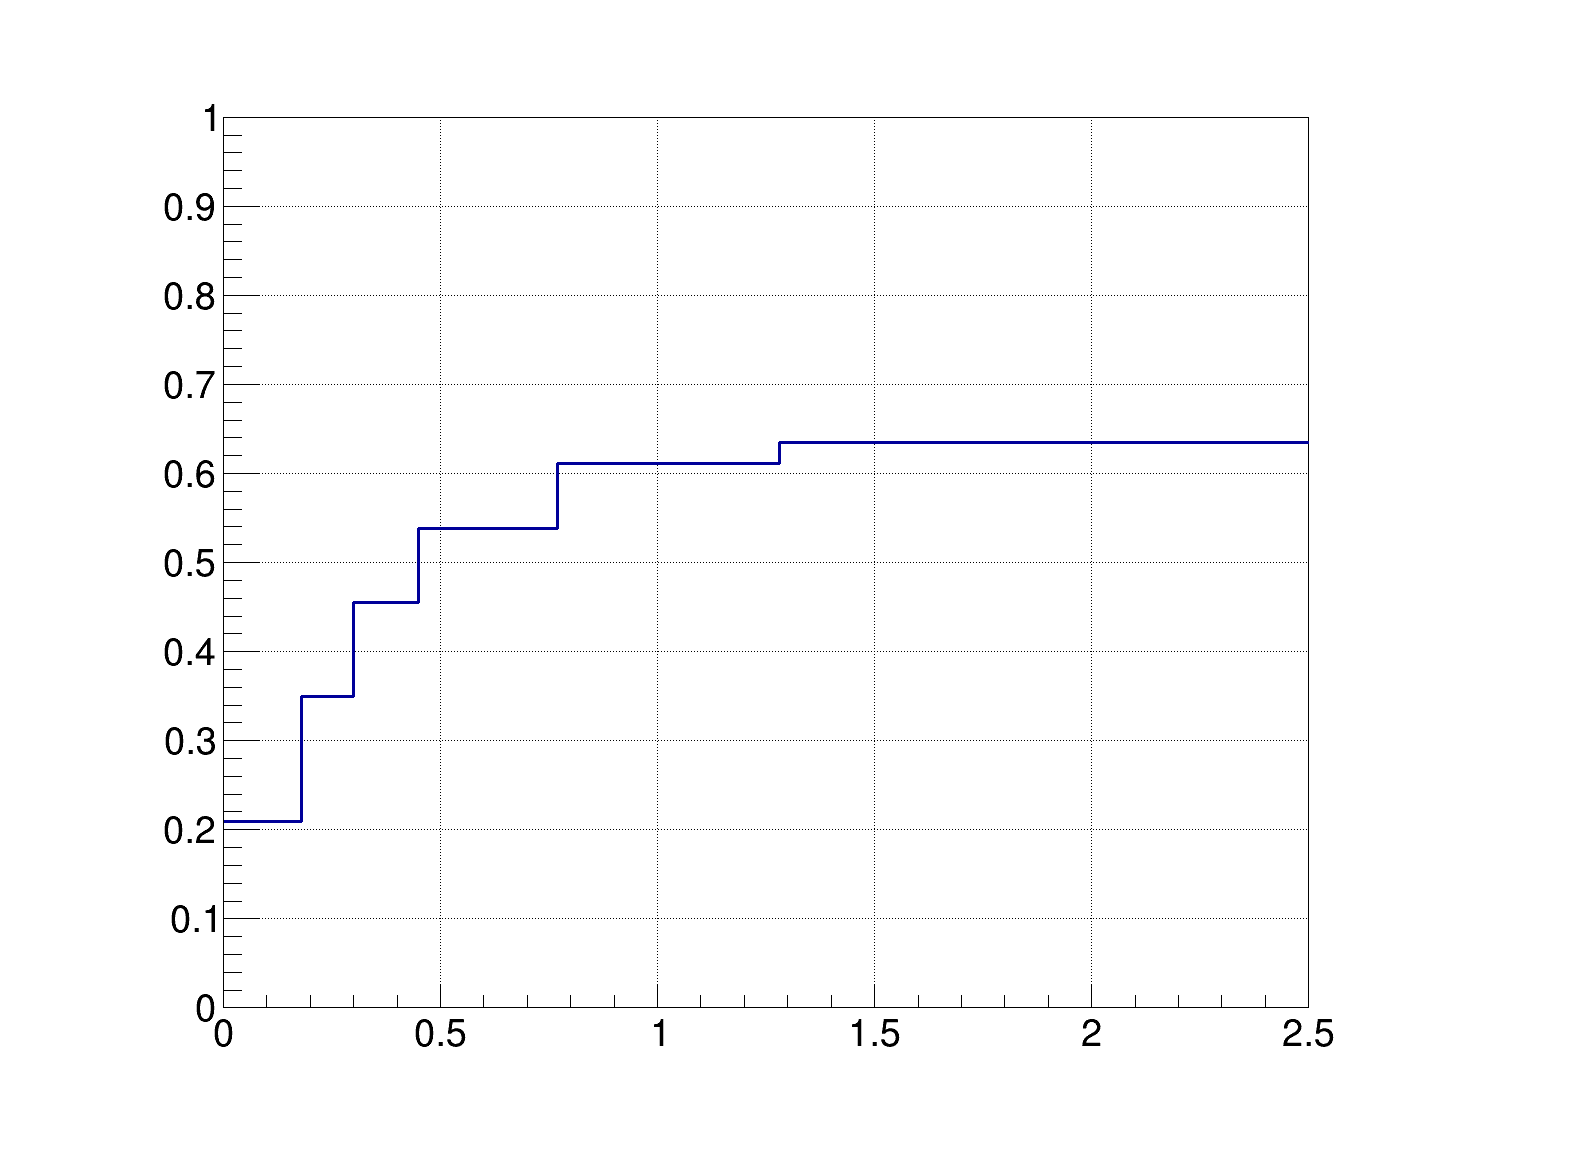

In [23]:
h_eff_tilde = ROOT.TH1F("h_eff_tilde",'Efficiency tilde',binnum,array('f',mom_bins))
for i in range(1,binnum+1):
    h_eff_tilde.SetBinContent(i,eff_tilde[i-1])
    h_eff_tilde.SetBinError(i,0)
h_eff_tilde.SetMaximum(1)
h_eff_tilde.SetMinimum(0)
h_eff_tilde.SetLineWidth(3)
h_eff_tilde.Draw('E1')
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_tilde_xsecMom.png")
c1.SaveAs(globale.outputdir_root + "h_eff_tilde_xsecMom.root")

h_eff_tilde.Write("h_eff_tilde")

In [24]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
variable = 'TrackMomMCS_mom'
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

h_data = ROOT.TH1F("h_data",'h_data',binnum,array('f',mom_bins))
h_ext = ROOT.TH1F("h_ext",'h_ext',binnum,array('f',mom_bins))
h_dirt = ROOT.TH1F("h_dirt",'h_dirt',binnum,array('f',mom_bins))
h_overlay = ROOT.TH1F("h_overlay",'h_overlay',binnum,array('f',mom_bins))
#h_weight_func_n = ROOT.TH1F("h_weight_func_n",'h_weight_func',binnum,array('f',mom_bins))

globale.data_out.Draw(variable+'>>h_data',cut,'')
globale.ext_out.Draw(variable+'>>h_ext',cut,'')
globale.dirt_out.Draw(variable+'>>h_dirt',weight_name+'*('+cut+')','')
globale.overlay_out.Draw(variable+'>>h_overlay',weight_name+'*('+cut+'&& !numu_signal)','')


28748L

In [25]:
h_data.Sumw2()
h_ext.Sumw2()
h_dirt.Sumw2()
h_overlay.Sumw2()
h_data.Scale(globale.scale[globale.data])
h_ext.Scale(globale.scale[globale.ext])
h_dirt.Scale(globale.scale[globale.dirt])
h_overlay.Scale(globale.scale[globale.overlay])

h_data.Write("h_data")
h_ext.Write("h_ext")
h_dirt.Write("h_dirt")
h_overlay.Write("h_overlay")

439

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


In [26]:
print h_overlay.GetSumOfWeights()
h_data.Add(h_ext,-1)
h_data.Add(h_dirt,-1)
h_data.Add(h_overlay,-1)
print h_data.GetSumOfWeights()

222.55488205
1026.50356007


In [27]:
h_data.Divide(h_eff_tilde)
h_data.Scale(1.0/(N_tot*beam_flux))

In [28]:
h_overlay_sig = ROOT.TH1F("h_overlay_sig",'h_overlay',binnum,array('f',mom_bins))
globale.overlay_out.Draw(variable+'>>h_overlay_sig',weight_name+'*('+cut+'&& numu_signal)','')
h_overlay_sig.Scale(globale.scale[globale.overlay])
h_overlay_sig.Divide(h_eff_tilde)
h_overlay_sig.Scale(1.0/(N_tot*beam_flux))

In [29]:
for i in range(1,binnum+1):
    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))
    print h_data.GetBinContent(i)/h_data.GetBinWidth(i)

3.2629466995e-39
7.19060630563e-38
8.15113118901e-38
3.11033396439e-38
5.52400932192e-39
1.3889738969e-40


422

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_weighted//png/h_xsec_corr.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_weighted//root/h_xsec_corr.root has been created


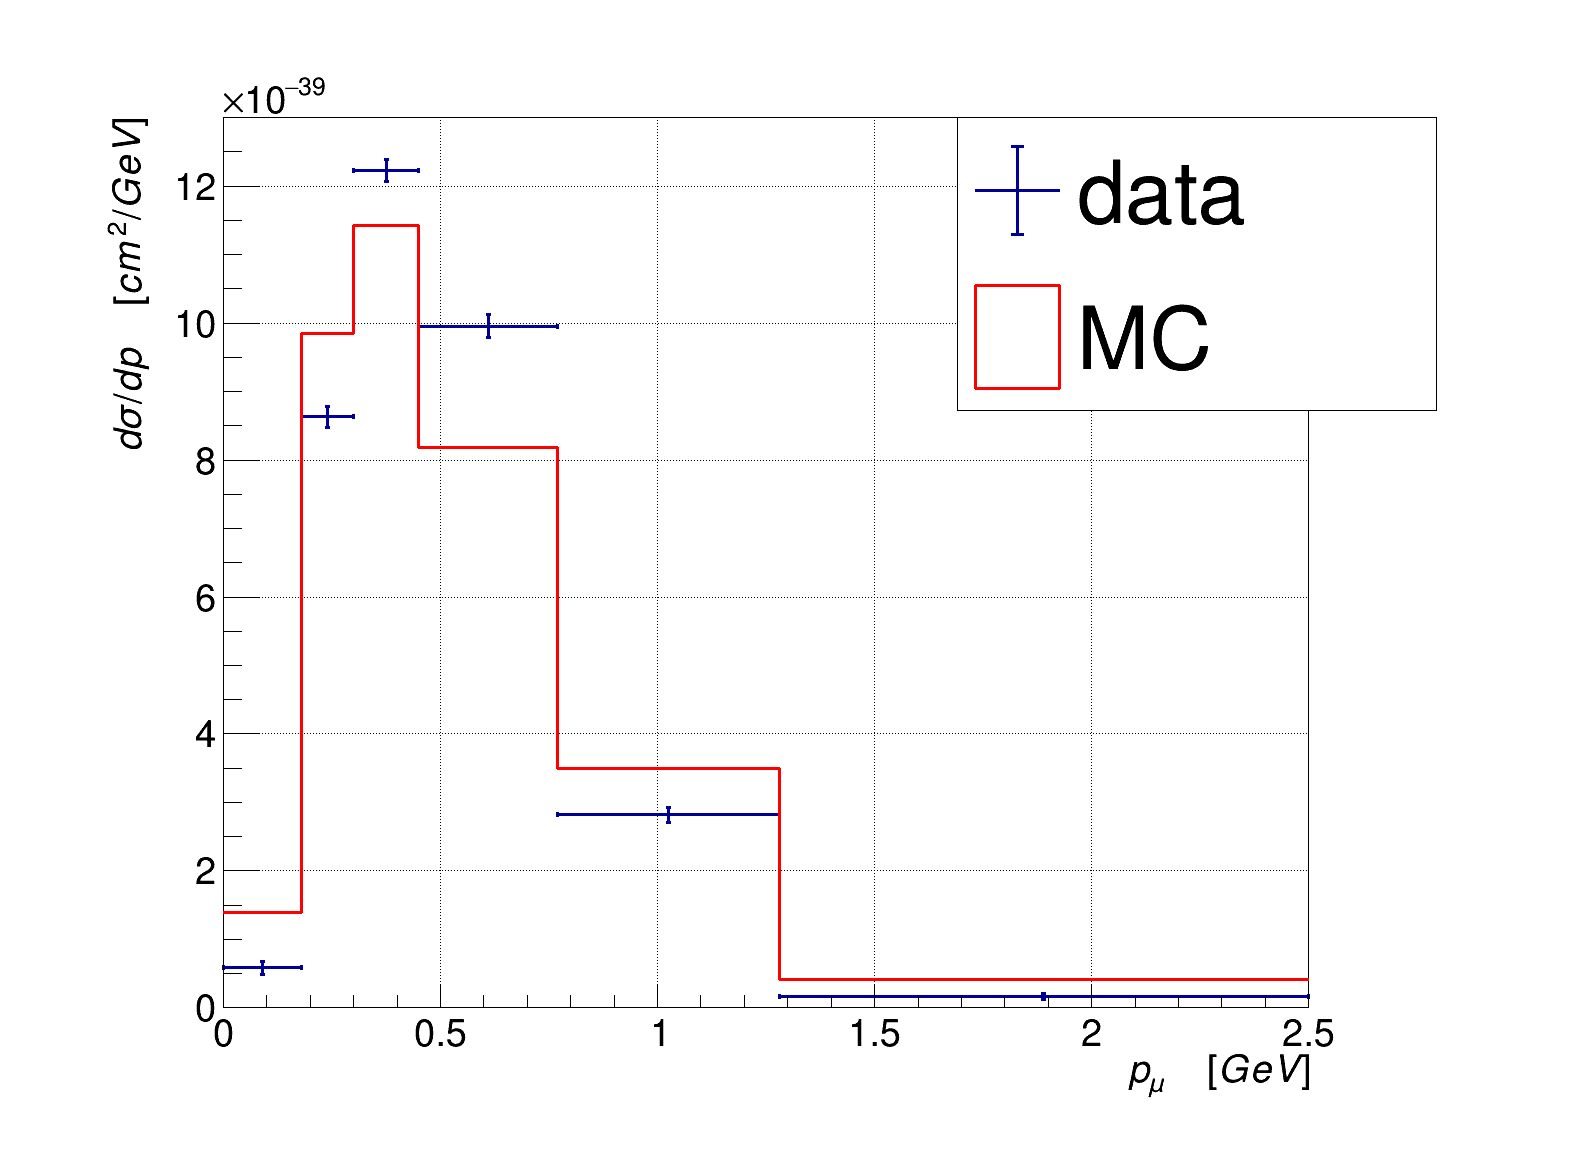

In [29]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("d\sigma / dp \quad [cm^2/GeV]")
h_data.SetXTitle("p_{\mu} \quad [GeV]")
h_data.SetLineWidth(3)
h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(3)
h_overlay_sig.Draw('hist same')
legend.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_corr.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_corr.root")

h_data.Write("h_xsec_data")
h_overlay_sig.Write("h_xsec_MC")

# Stop here is genie variation and flux variation is not run yet

In [30]:
if plot_systematic==0:
    exit()

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_weighted//png/h_xsec_corr_genieall.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_weighted//root/h_xsec_corr_genieall.root has been created


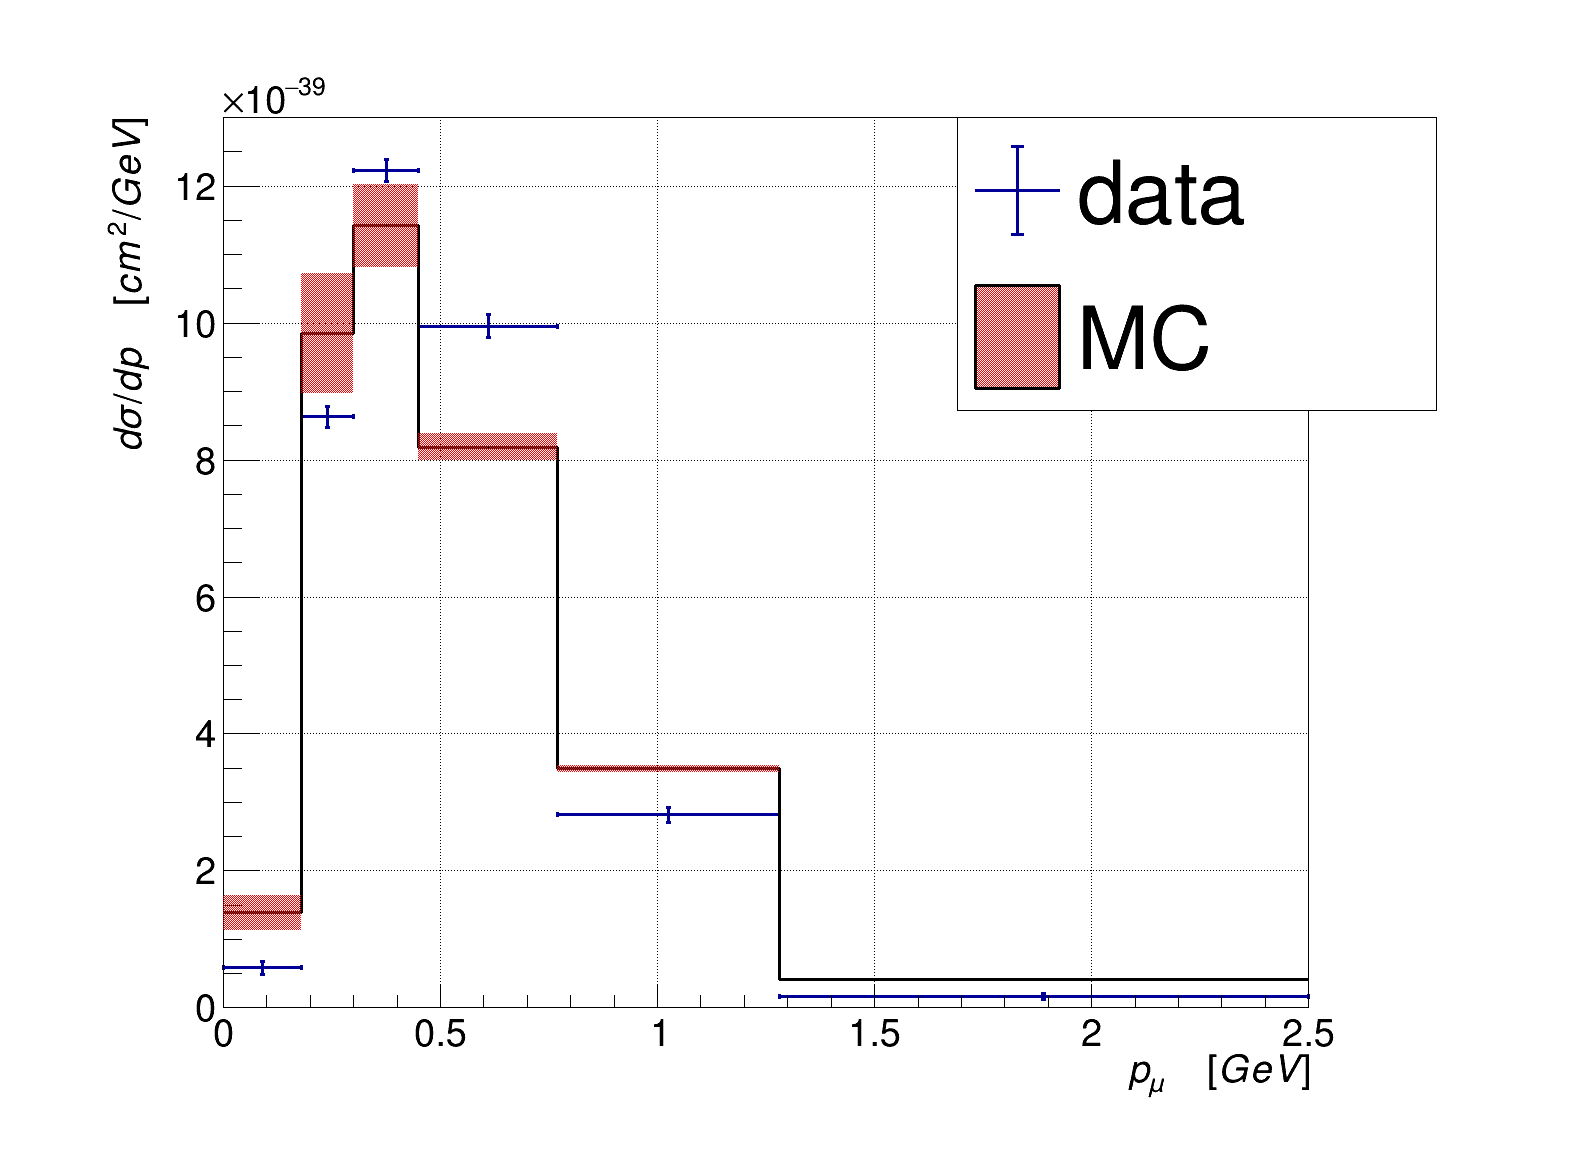

In [31]:
#include error from genie variation:
xsec_std_bin = np.load('/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_weighted/xsec_genie_all_change.npy')
for i in range(1,binnum+1):
    h_overlay_sig.SetBinError(i,xsec_std_bin[i-1])
    
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("d\sigma / dp \quad [cm^2/GeV]")
h_data.SetXTitle("p_{\mu} \quad [GeV]")
h_data.SetLineWidth(3)
h_data.Draw('E1')
h_overlay_sig.SetLineColor(1)
h_overlay_sig.SetLineWidth(3)
h_overlay_sig.SetFillColor(0)
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
legend.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_corr_genieall.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_corr_genieall.root")

In [32]:
weight_list_flux = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim', 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
    'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
    'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
    'piplus_PrimaryHadronSWCentralSplineVariation' ]

num_para = len(weight_list_flux)
print num_para

13


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_weighted//png/h_xsec_corr_expskin_FluxUnisim.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_weighted//root/h_xsec_corr_expskin_FluxUnisim.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_weighted//png/h_xsec_corr_horncurrent_FluxUnisim.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_weighted//root/h_xsec_corr_horncurrent_FluxUnisim.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_weighted//png/h_xsec_corr_kminus_PrimaryHadronNormalization.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_mome

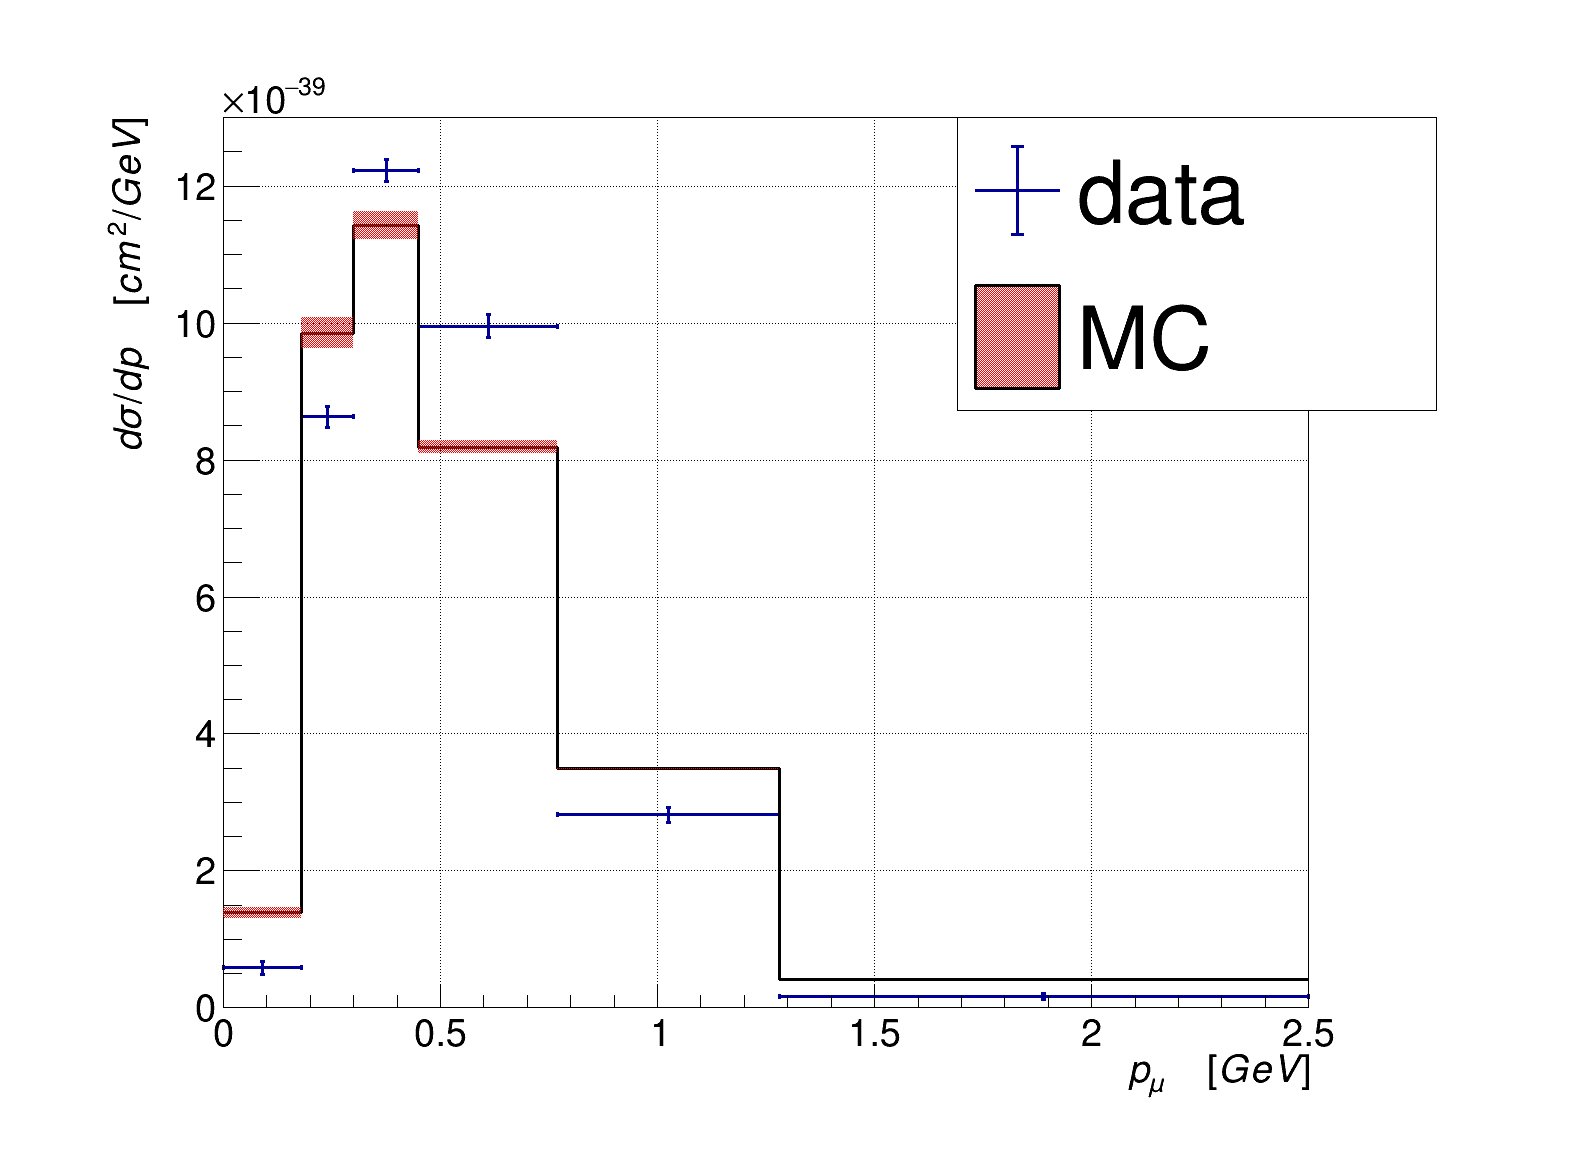

In [33]:
#include error from genie variation:
xsec_std_bin_tot = np.load('/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_flux/xsec_'+weight_list_flux[0]+'_momentum.npy')
xsec_std_bin_tot = np.zeros(xsec_std_bin_tot.shape)

for para in range(num_para):
    xsec_std_bin = np.load('/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_flux/xsec_'+weight_list_flux[para]+'_momentum.npy')
    xsec_std_bin_tot = xsec_std_bin_tot+xsec_std_bin
    for i in range(1,binnum+1):
        h_overlay_sig.SetBinError(i,xsec_std_bin[i-1])

    legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
    h_overlay_sig.SetLineColor(2)
    legend.AddEntry(h_data,'data',"lep");
    legend.AddEntry(h_overlay_sig,'MC',"f");
    h_data.SetYTitle("d\sigma / dp \quad [cm^2/GeV]")
    h_data.SetXTitle("p_{\mu} \quad [GeV]")
    h_data.SetLineWidth(3)
    h_data.Draw('E1')
    h_overlay_sig.SetLineColor(1)
    h_overlay_sig.SetLineWidth(3)
    h_overlay_sig.SetFillColor(0)
    h_overlay_sig.DrawCopy('Hist same')
    h_overlay_sig.SetFillColor(2)
    h_overlay_sig.SetFillStyle(3001)
    h_overlay_sig.Draw('E2 same')
    legend.Draw()
    c1.Draw()
    c1.SaveAs(globale.outputdir_png + 'h_xsec_corr_'+weight_list_flux[para]+'.png')
    c1.SaveAs(globale.outputdir_root + 'h_xsec_corr_'+weight_list_flux[para]+'.root')

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_weighted//png/h_xsec_corr_flux_all.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_weighted//root/h_xsec_corr_flux_all.root has been created


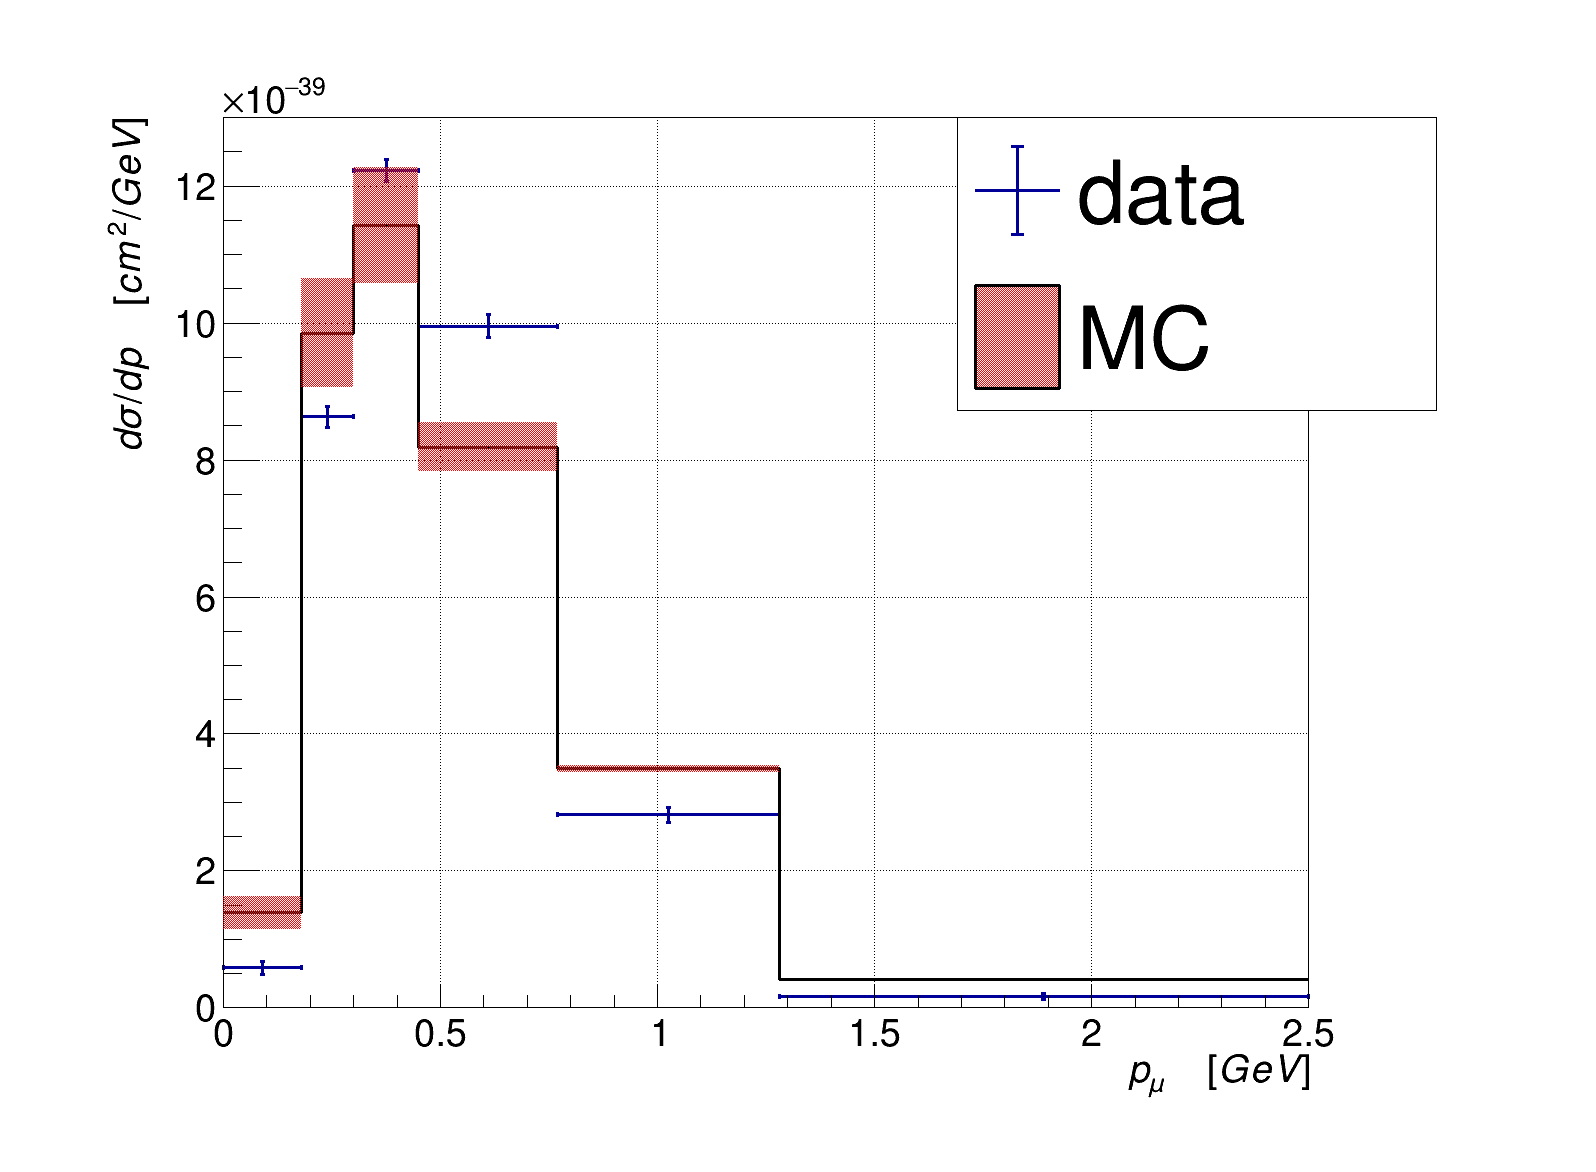

In [34]:
for i in range(1,binnum+1):
    h_overlay_sig.SetBinError(i,xsec_std_bin_tot[i-1])

legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("d\sigma / dp \quad [cm^2/GeV]")
h_data.SetXTitle("p_{\mu} \quad [GeV]")
h_data.SetLineWidth(3)
h_data.Draw('E1')
h_overlay_sig.SetLineColor(1)
h_overlay_sig.SetLineWidth(3)
h_overlay_sig.SetFillColor(0)
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
legend.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + 'h_xsec_corr_flux_all.png')
c1.SaveAs(globale.outputdir_root + 'h_xsec_corr_flux_all.root')

'\nlegend = ROOT.TLegend(0.6,0.65,0.9,0.9)\nh_overlay_sig.SetLineColor(2)\nlegend.AddEntry(h_data,\'data\',"lep");\nlegend.AddEntry(h_overlay_sig,\'MC\',"f");\nh_data.SetYTitle("d\\sigma / dp \\quad [cm^2/GeV]")\nh_data.SetXTitle("p_{\\mu} \\quad [GeV]")\nh_data.SetLineWidth(3)\nh_data.Draw(\'E1\')\nh_overlay_sig.SetLineColor(1)\nh_overlay_sig.SetLineWidth(3)\nh_overlay_sig.SetFillColor(0)\nh_overlay_sig.DrawCopy(\'Hist same\')\nh_overlay_sig.SetFillColor(2)\nh_overlay_sig.SetFillStyle(3001)\nh_overlay_sig.Draw(\'E2 same\')\nlegend.Draw()\nc1.Draw()\nc1.SaveAs(globale.outputdir_png + \'h_xsec_corr_flux_genie_all.png\')\nc1.SaveAs(globale.outputdir_root + \'h_xsec_corr_flux_genie_all.root\')'

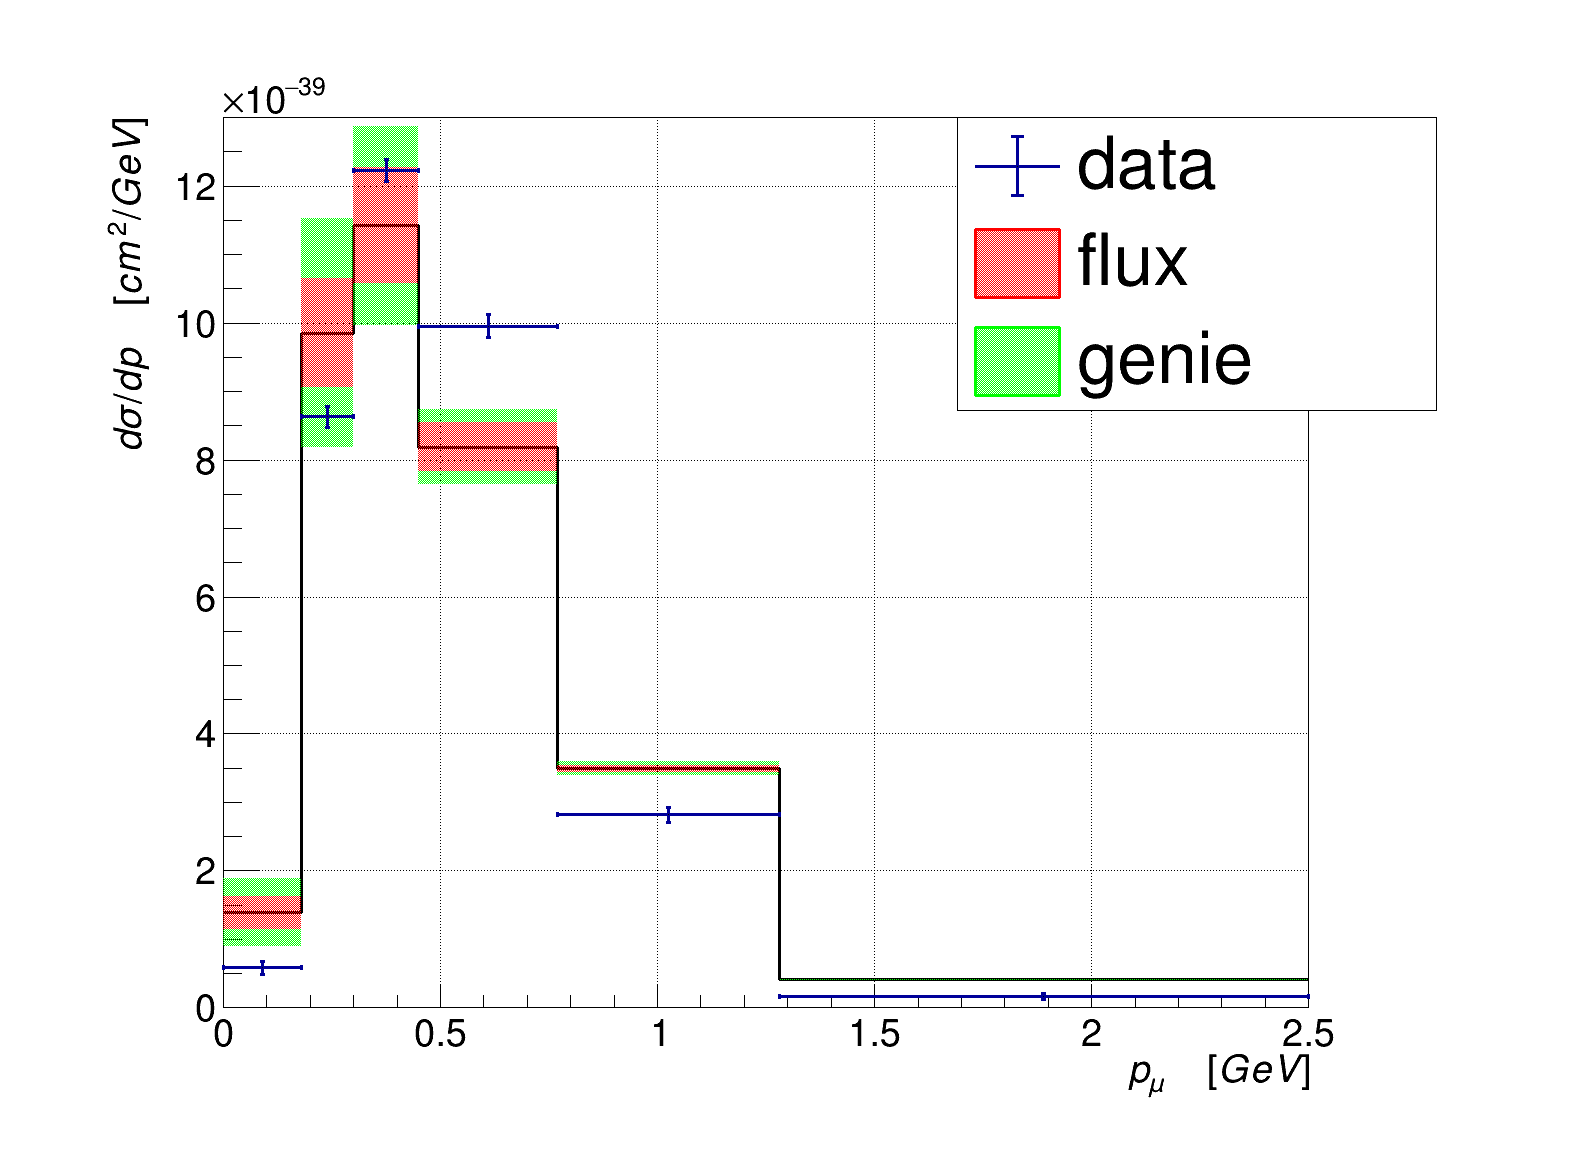

In [35]:
xsec_std_bin = np.load('/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_weighted/xsec_genie_all_change.npy')
#h_overlay_sig_2 = ROOT.TH1F("h_overlay_sig_2",'h_overlay',binnum,array('f',mom_bins))
h_overlay_sig_2 = h_overlay_sig.Clone()
gr = ROOT.TGraphErrors(h_overlay_sig)
h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.Draw('same HIST')
#gr.SetMarkerStyle(3);
gr.SetMarkerSize(2.2);
gr.SetLineColor(2)
#gr.Draw(“P”);
#gr.Draw('P')
#c1.Draw()
for i in range(1,binnum+1):
    h_overlay_sig_2.SetBinError(i,xsec_std_bin[i-1]+xsec_std_bin_tot[i-1])

gr2 = ROOT.TGraphErrors(h_overlay_sig_2)
#gr2.SetMarkerStyle(21);
gr2.SetMarkerSize(2.2);
gr2.SetLineColor(3)
gr2.SetFillColor(3);
#gr2.SetFillStyle(3001);
#gr2.Draw('2')
#gr.Draw('2')
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(gr,'flux',"f");
legend.AddEntry(gr2,'genie',"f");

gr2.Draw("2");
gr.Draw('2')
h_data.Draw('same E1')
#h_overlay_sig_2.Draw('HIST')
legend.Draw()
#gr2.Draw('[]')
c1.Draw() 
'''
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("d\sigma / dp \quad [cm^2/GeV]")
h_data.SetXTitle("p_{\mu} \quad [GeV]")
h_data.SetLineWidth(3)
h_data.Draw('E1')
h_overlay_sig.SetLineColor(1)
h_overlay_sig.SetLineWidth(3)
h_overlay_sig.SetFillColor(0)
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
legend.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + 'h_xsec_corr_flux_genie_all.png')
c1.SaveAs(globale.outputdir_root + 'h_xsec_corr_flux_genie_all.root')'''

NameError: name 'f' is not defined

In [31]:
# close the root file with all the histos
RootFile.Close()